<a href="https://colab.research.google.com/github/yajuna/126jupyternotebooks/blob/master/week1_sequences_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook, we look at some examples of sequences and series. We will also use this notebook as an introduction to Jupyter notebook and Python3.

In [1]:
## import packages, and conventional abbrev.
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt

## for math display
from IPython.display import display, Markdown

## check versions of above packages
print(np.version.version,"\n", sp.__version__,"\n", matplotlib.__version__)

1.23.5 
 1.11.2 
 3.7.1


## We look at some examples of sequences and their convergence.

### Example1: We have sequences in Calculus 2- consider the $n$-th Riemann sum of a function $f(x)$ on the interval $[a,b]$, $A_n = \sum^{n-1}_{i=0}f(a + i\Delta x)\Delta x$. When $n\to \infty$, the Riemann sum should get closer and closer to the definite integral $\int^b_af(x)\ dx$.

Let $f(x)=x$, and $[a,b]=[0,2]$. We know $\int^2_0 f(x)\ dx = 2$, and we will investigate a sequence of Riemann sums $A_n$ that sum over $n$ items.

In [2]:
# First compute the integral with the Trapezoid rule
a = 0
b = 2
n = 50
x = np.linspace(a, b, n)
f = x
I_trapz = np.trapz(f,x)

display(Markdown(
   rf"""
$\int^2_0x\ dx = $
"""), I_trapz)


$\int^2_0x\ dx = $


2.0

In [3]:
# Define the n-th Riemann sum

def riemann(f,a,b,n, endpoint = 0):
    x = np.linspace(a,b,n)
    y = f(x)
    dx = x[1] - x[0]
    riemann_sum = 0
    for j in range(n):
        riemann_sum += f(x[j] + dx * endpoint) * dx
    return riemann_sum

In [4]:
f = lambda x : x
n = 5000
x = np.linspace(0,2,5000)
A_n = riemann(f,0,2,5000, endpoint = 0)
print("The ", n, "-th Riemann sum is", A_n)

The  5000 -th Riemann sum is 2.000400080016003


In [5]:
steps = [n for n in range(50,int(5e3), 50)]
Rsums = [riemann(f,0,2,n, endpoint = 0) for n in steps]

Text(0.5, 1.0, 'Riemann Sum as a function of n')

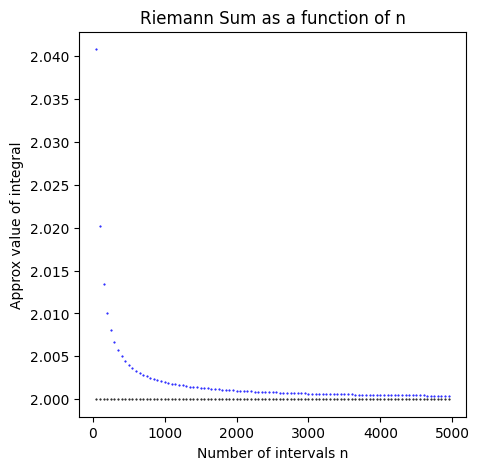

In [6]:
# visualize
plt.figure(figsize=(5,5))
plt.plot(steps,Rsums,'b.',markersize=1)
plt.plot(steps,2*np.ones(len(steps)),'k.',markersize=1)
plt.xlabel('Number of intervals n')
plt.ylabel('Approx value of integral')
plt.title('Riemann Sum as a function of n')

### Example2: Consider the improper integral $\int^{\infty}_0\frac{1}{x^2+1}\ dx$, and consider the sequence $a_n=\int^n_0\frac{1}{x^2+1}\ dx$. If the improper integral converges, the limit $\lim_{n\to\infty}a_n$ should exist. We look at the sequence $a_n$.

Text(0.5, 1.0, 'Integral as a function of n')

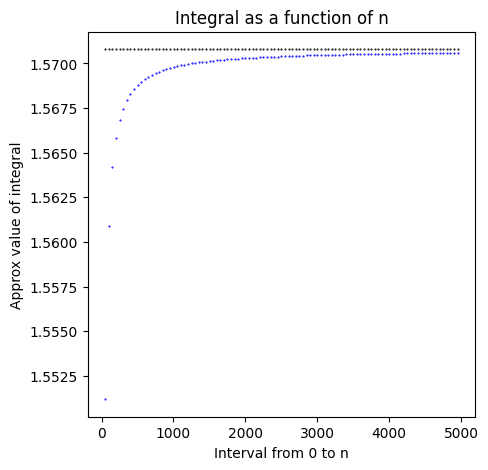

In [7]:
f = lambda x : 1/(x**2 + 1)

ranges = [n for n in range(1, int(5e3), 50)]
Rsums1 = [riemann(f,0,n,50 * n, endpoint = 0.5) for n in ranges]

plt.figure(figsize=(5,5))
plt.plot(ranges[1:],Rsums1[1:],'b.',markersize=1)
plt.plot(ranges[1:],np.pi/2*np.ones(len(ranges))[1:],'k.',markersize=1)
plt.xlabel('Interval from 0 to n')
plt.ylabel('Approx value of integral')
plt.title('Integral as a function of n')

# experiment with endpoint = 0, 0.5, and 1 (left, middle, and right endpoint)

### Example3: We look at two ways to define a sequence (other than listing)
1. Formula definition: $a_n = f(n)$
2. Recursive definition: $a_n = f(a_{n-1})$

In [8]:
# define a sequence as a function of n: 1/n * (-1)**n
def seq_formula(n):
    return 1/n * (-1)**n

Text(0.5, 1.0, '$a_n = f(n)$')

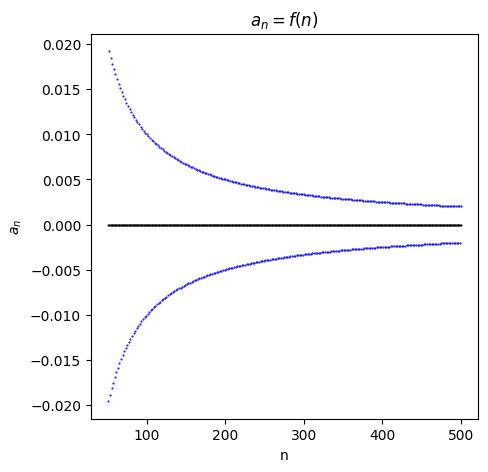

In [9]:
list_range = [n for n in range(1,int(5e3))]
seq = [seq_formula(n) for n in list_range]

plt.figure(figsize=(5,5))
plt.plot(list_range[50:500],seq[50:500],'b.',markersize=1)
plt.plot(list_range[50:500],0 * np.ones(len(list_range))[50:500],'k.',markersize=1)
plt.xlabel('n')
plt.ylabel('$a_n$')
plt.title('$a_n = f(n)$')

Text(0.5, -0.25, 'Example of a Lucas sequence-Fibonacci sequence')

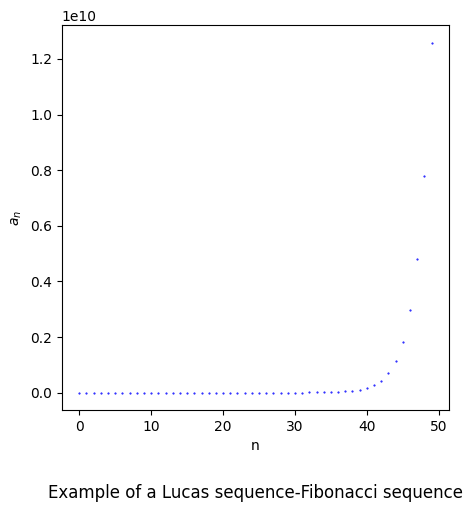

In [10]:
# define a sequence recursively
def seq_formula1(a0, a1):
    return a0 + a1

x = [n for n in range(0,int(5e3))]
f = [1,1]
for j in range(2, n):
    f.append(f[j-1]+f[j-2])

plt.figure(figsize=(5,5))
plt.plot(x[:50],f[:50],'b.',markersize=1)

plt.xlabel('n')
plt.ylabel('$a_n$')
plt.title('Example of a Lucas sequence-Fibonacci sequence',y=-0.25)

# # Alternate form and test
# def F(k):
#     if k == 0:
#         return 0
#     elif k == 1:
#         return 1
#     else:
#         return F(k-1)+F(k-2)

# [F(n) for n in range(12)]

## We study series $\sum^{\infty}_{i=1}a_i$ by studying the sequence of the partial sums $S_n = \sum^{n}_{i=1}a_i$. If the sequence of the partial sum converges, we say the series converges.

Text(0.5, 1.0, 'Sequence of partial sum for $\\sum^{\\infty}_0 1/2^n$')

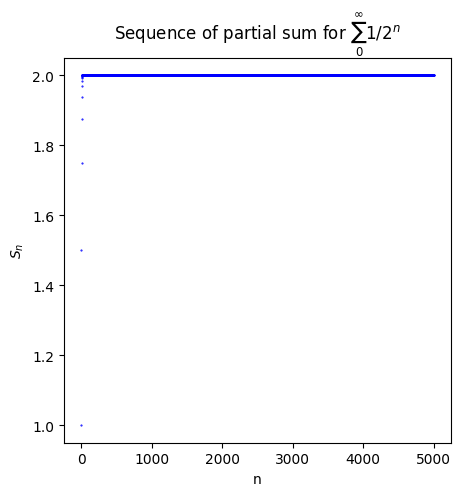

In [11]:
# Example of a convergent series
f = lambda n : 1/2**n
n = [i for i in range(0,int(5e3))]
partial_sum = [0]
for i in n:
    partial_sum.append(partial_sum[-1] + f(i))

plt.figure(figsize=(5,5))
plt.plot(n,partial_sum[1:],'b.',markersize=1)

plt.xlabel('n')
plt.ylabel('$S_n$')
plt.title('Sequence of partial sum for $\sum^{\infty}_0 1/2^n$')#,y=-0.25)


Text(0.5, 1.0, 'Sequence of partial sum for $\\sum^{\\infty}_1 1/n$')

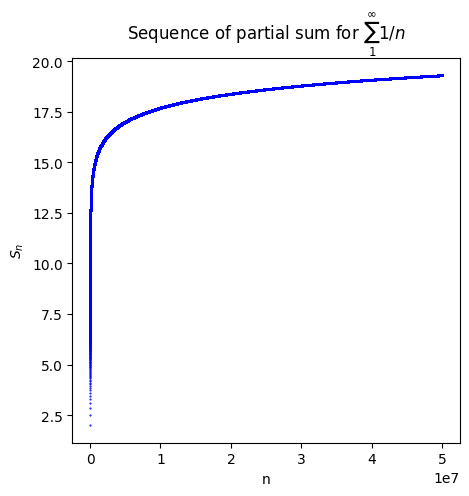

In [12]:
# Example of a (not obviously) divergent series
f = lambda n : 1/n
n = [i for i in range(1,int(5e7))]
partial_sum = [1]
for i in n:
    partial_sum.append(partial_sum[-1] + f(i))

plt.figure(figsize=(5,5))
plt.plot(n,partial_sum[1:],'b.',markersize=1)

plt.xlabel('n')
plt.ylabel('$S_n$')
plt.title('Sequence of partial sum for $\sum^{\infty}_1 1/n$')#,y=-0.25)
# experiment with 5e3, 5e4, 5e5. STOP at 5e7